In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import norm
from scipy import signal
from matplotlib import gridspec
import matplotlib 
from os import listdir
from os.path import isfile, join
import statsmodels.api as sm
from scipy.stats import fisher_exact,chi2_contingency
from scipy.signal import savgol_filter

In [10]:
beh=beh[beh.Choice!=-1]

In [7]:
mypath='D:/HexinData/Dylan_2024-03-19_14-42-22_HPC/Record Node 113/experiment1/recording1/HMaze_2024_03_19__14_44_09/'
stateNames=['A1','A2','A3','A4','A5']
beh = pd.DataFrame()
BlockLearning=pd.DataFrame()
    
for ii,f in enumerate(listdir(mypath)):
    
    beh_temp = pd.read_csv(join(mypath, f), sep=",")
#     beh_temp = pd.read_csv('C:/Users/liang/Documents/Thesis/LinearGraph/B/NewVersion/LinearBridge_2023_07_13__13_33_30.beh.txt', sep=",")
    beh_temp.reset_index(drop=True, inplace=True)
    beh_temp.insert(loc = 0,
          column = 'SessionNum',
          value = ii)
    beh = pd.concat([beh,beh_temp])
    
beh=beh[beh.Choice!=-1]

ParserError: Error tokenizing data. C error: Expected 3529 fields in line 4, saw 3683


Text(0.5, 1.0, 'Overall accuracy')

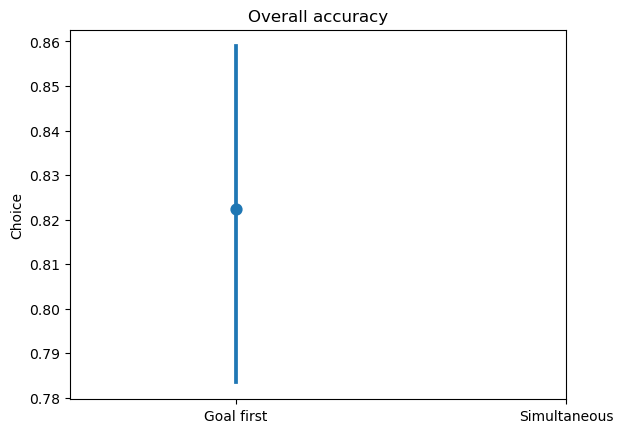

In [12]:
plt.close('all')
sns.pointplot(data=beh,x='SessionNum',y='Choice')
plt.xticks([0,1],['Goal first','Simultaneous'])
plt.xlabel('')
plt.title('Overall accuracy')

([<matplotlib.axis.XTick at 0x237c014b510>,
 [Text(0.0, 0, 'A1'),
  Text(1.0, 0, 'A3'),
  Text(2.0, 0, 'A5'),
  Text(3.0, 0, 'B1'),
  Text(4.0, 0, 'B3'),
  Text(5.0, 0, 'B5')])

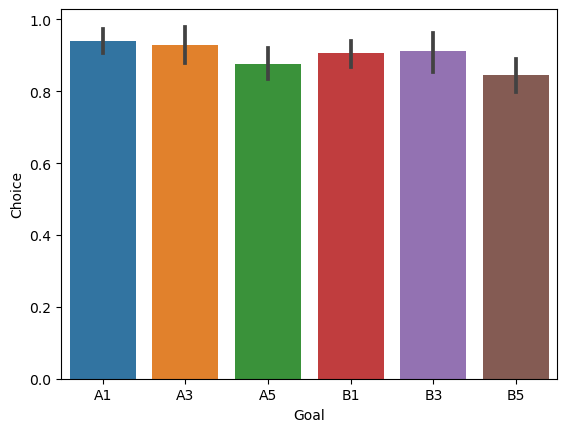

In [14]:
plt.close('all')
sns.barplot(data=beh[beh.SessionNum==4],x='Goal',y='Choice')
plt.xticks(np.linspace(0,5,6),['A1','A3','A5','B1','B3','B5'])

<Axes: xlabel='CurrentState', ylabel='Choice'>

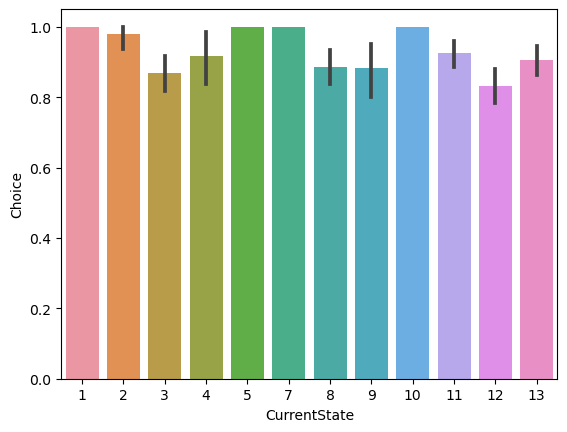

In [15]:
plt.close('all')
sns.barplot(data=beh[beh.SessionNum==4],x='CurrentState',y='Choice')
plt.xticks(np.linspace(0,5,6),['A1','A2','A3','A5','B1','B3','B5'])

([<matplotlib.axis.YTick at 0x237c03c8c10>,
 [Text(0, 0.5, 'A1'),
  Text(0, 1.5, 'A3'),
  Text(0, 2.5, 'A5'),
  Text(0, 3.5, 'B1'),
  Text(0, 4.5, 'B3'),
  Text(0, 5.5, 'B5')])

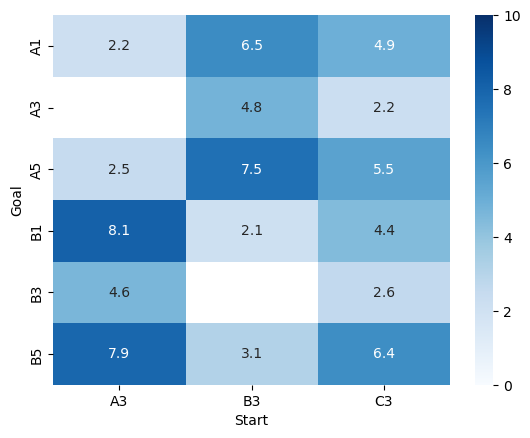

In [10]:
ses = beh[beh.SessionNum==4]
triallength=pd.concat([ses.groupby(['TotalEpisodeNum']).count().TrialNum,
                      ses.groupby(['TotalEpisodeNum']).mean()[['Goal','Start','EpisodeLength']]],
                      axis=1).groupby(['Goal','Start']).mean().reset_index()

cmap=triallength.groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
plt.close('all')
sns.heatmap(cmap,cmap='Blues',vmin=0,vmax=10,annot=True)
plt.xticks(np.linspace(0.5,2.5,3),['A3','B3','C3'])
plt.yticks(np.linspace(0.5,5.5,6),['A1','A3','A5','B1','B3','B5'])

<Axes: xlabel='Start', ylabel='Goal'>

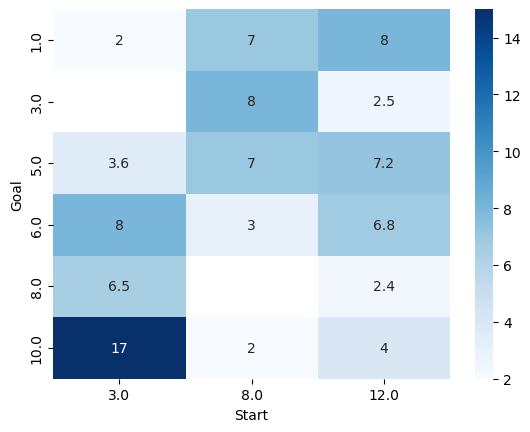

In [30]:
triallength=pd.concat([first_episodes.groupby(['TotalEpisodeNum']).count().TrialNum,
                      first_episodes.groupby(['TotalEpisodeNum']).mean()[['Goal','Start','EpisodeLength']]],
                      axis=1).groupby(['Goal','Start']).mean().reset_index()

cmap=triallength.groupby(['Goal','Start']).mean()['TrialNum'].reset_index().pivot(index='Goal', columns='Start', values='TrialNum')
plt.close('all')
sns.heatmap(cmap,cmap='Blues',vmin=2,vmax=15,annot=True)

In [13]:
first_episodes = beh[beh.EpisodeNum==1]

In [14]:
first_trials = first_episodes[first_episodes.TrialNum==1]

Text(0.5, 1.0, 'Accuracy on 1st trial')

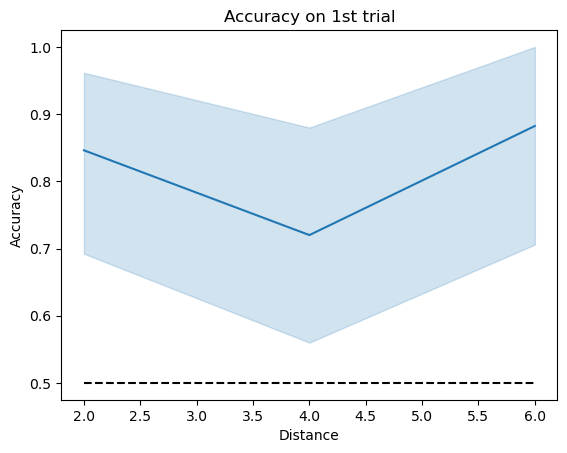

In [15]:
plt.close('all')
g = sns.lineplot(data=first_trials,x='Distance',y='Choice')
# g.legend_.set_title('')
# g.legend_.set_bbox_to_anchor((0.4, 0.25))
# new_labels = ['Goal first', 'Simultaneous']
# for t, l in zip(g.legend_.texts, new_labels):
#     t.set_text(l)
plt.plot([2,6],[0.5,0.5],'k--')
plt.ylabel('Accuracy')
plt.title('Accuracy on 1st trial')

In [22]:
def calculate_length(df):
    
    OptimalEpisodeLength = df.groupby(['SessionNum', 'GoalBlockNum', 'TotalEpisodeNum']).EpisodeLength.mean().values
    EpisodeLength = df.groupby(['SessionNum', 'GoalBlockNum', 'TotalEpisodeNum']).EpisodeLength.count().values
    episode_length_df = pd.DataFrame(data={'optimal': OptimalEpisodeLength, 'actual': EpisodeLength})
    
    return episode_length_df

Text(0.5, 1.0, 'Trial length of first walks')

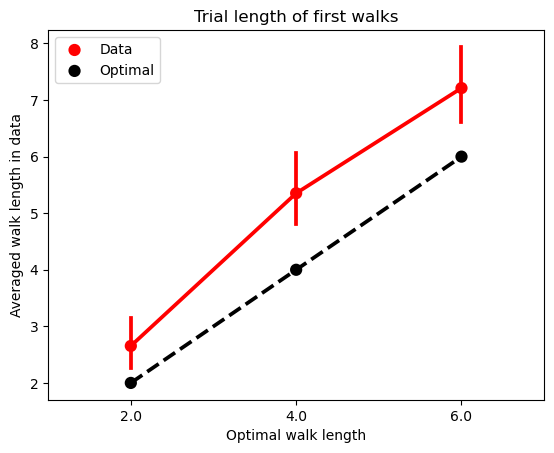

In [23]:
plt.close('all')

episode_length_df = calculate_length(first_episodes[first_episodes.SessionNum==4])
sns.pointplot(data=episode_length_df,x='optimal',y='actual',color='r',label='Data')
sns.pointplot(data=episode_length_df,x='optimal',y='optimal',color='k',linestyles='--',label='Optimal')

# episode_length_df = calculate_length(first_episodes[first_episodes.SessionNum==1])
# sns.pointplot(data=episode_length_df,x='optimal',y='actual',color='b',label='Simultaneous')

# episode_length_df = calculate_length(first_episodes[first_episodes.SessionNum==4])
# sns.pointplot(data=episode_length_df,x='optimal',y='actual',color='g',label='today')

# episode_length_df = calculate_length(first_episodes[first_episodes.SessionNum==3])
# sns.pointplot(data=episode_length_df,x='optimal',y='actual',color='m',label='Simultaneous')

plt.xlabel('Optimal walk length')
plt.ylabel('Averaged walk length in data')
plt.legend()
plt.title('Trial length of first walks')

In [143]:
correct_epinum = first_episodes[(first_episodes.CompletedNum==1) & (first_episodes.Choice==1)].TotalEpisodeNum.values
correct_epi_ind = first_episodes['TotalEpisodeNum'].isin(correct_epinum).values

Text(0, 0.5, 'Averaged walk length in data')

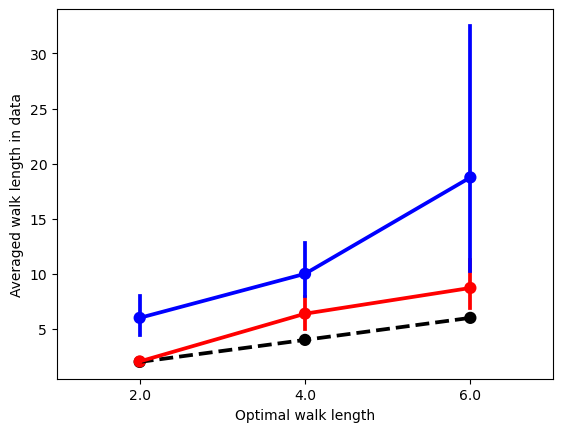

In [144]:
plt.close('all')

sns.pointplot(data=episode_length_df,x='optimal',y='optimal',color='k',linestyles='--')

episode_length_df = calculate_length(first_episodes.iloc[correct_epi_ind,:])
sns.pointplot(data=episode_length_df,x='optimal',y='actual',color='r')

episode_length_df = calculate_length(first_episodes.iloc[~correct_epi_ind,:])
sns.pointplot(data=episode_length_df,x='optimal',y='actual',color='b')

plt.xlabel('Optimal walk length')
plt.ylabel('Averaged walk length in data')

In [68]:
def  calculateBlock(df):

    BlockLearning=pd.DataFrame()
    
    for ses_num in df.SessionNum.unique():
        
        ses_perf = df[df.SessionNum==ses_num]
        
        for block_num in ses_perf.GoalBlockNum.unique():

            block_perf = ses_perf[ses_perf.GoalBlockNum==block_num]
            temp=block_perf[['SessionNum', 'GoalBlockNum', 'TotalEpisodeNum', 'EpisodeNum', 'Goal',
                             'Start', 'EpisodeLength', 'CurrentState','Distance','Choice']].copy()

            for _, dis in enumerate(np.unique(temp.Distance.values)):
                tempbydis=temp[temp.Distance==dis].copy()
                tempbydis['NumberofVisits']=tempbydis.reset_index().index

                BlockLearning = pd.concat([BlockLearning, tempbydis])
                
    return BlockLearning

In [69]:
beh_block =  calculateBlock(beh)

<Axes: xlabel='NumberofVisits', ylabel='Choice'>

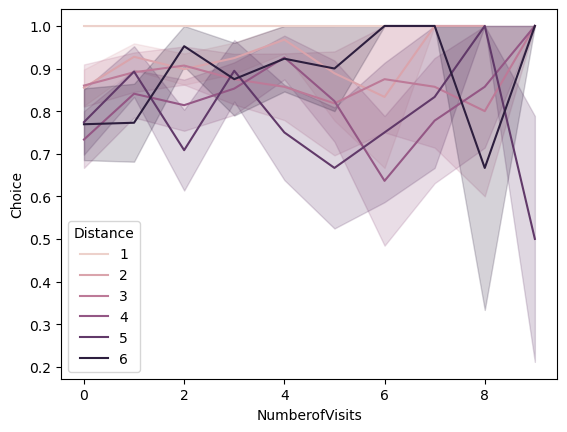

In [70]:
plt.close('all')
sns.lineplot(data=beh_block[(beh_block.NumberofVisits<10) & (beh_block.Distance<7)],
             x='NumberofVisits',y='Choice',hue='Distance',errorbar=('se', 1))

In [74]:
center = beh[(beh.CurrentState!=1) & (beh.CurrentState!=5) & (beh.CurrentState!=6) & (beh.CurrentState!=10)]
center.reset_index(drop=True,inplace=True)
goalblock = np.insert(np.where(np.diff(center.Goal.values)!=0)[0]+1,0,False)
goalblock = np.append(goalblock,len(center))

Text(0, 0.5, 'Accuracy')

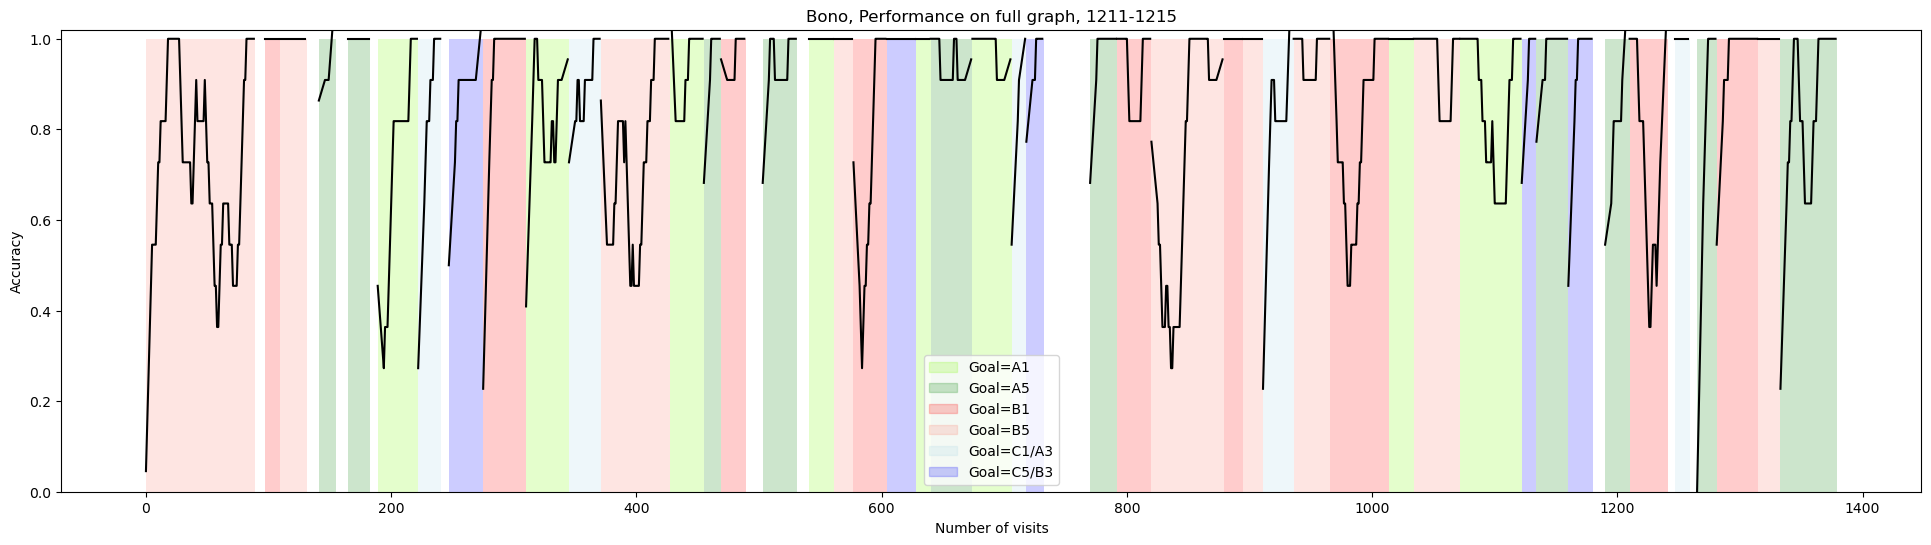

In [75]:
plt.close('all')
plt.figure(figsize=(24,6),facecolor=(1, 1, 1))
goalcolors=['lawngreen','','lightblue','','g','r','','b','','salmon']

for bb in range(len(goalblock)-2):
    blockindex=np.arange(goalblock[bb],goalblock[bb+1])
    if len(blockindex)>11:
        plt.plot(blockindex,savgol_filter(center.iloc[blockindex]['Choice'].values,11,1),color='k')
        plt.fill_between([blockindex[0],blockindex[-1]+1],[1,1],alpha=0.2,linewidth=0,
                         color=goalcolors[int(center.iloc[blockindex]['Goal'].values[0]-1)])
#     if center.iloc[blockindex[0]]['SessionNum']==4:
#         plt.fill_between([blockindex[0],blockindex[-1]+1],[0.05,0.05],linewidth=0,color='k')

plt.fill_between([0,0],[0,0],color=goalcolors[0],label='Goal=A1',alpha=0.2)
plt.fill_between([0,0],[0,0],color=goalcolors[4],label='Goal=A5',alpha=0.2)
plt.fill_between([0,0],[0,0],color=goalcolors[5],label='Goal=B1',alpha=0.2)
plt.fill_between([0,0],[0,0],color=goalcolors[9],label='Goal=B5',alpha=0.2)
plt.fill_between([0,0],[0,0],color=goalcolors[2],label='Goal=C1/A3',alpha=0.2)
plt.fill_between([0,0],[0,0],color=goalcolors[7],label='Goal=C5/B3',alpha=0.2)

plt.legend(loc='lower center')
plt.ylim(0,1.02)
plt.title('Bono, Performance on full graph, 1211-1215')
plt.xlabel('Number of visits')
plt.ylabel('Accuracy')
# plt.savefig('Bono, Performance on full graph, 1211-1215')

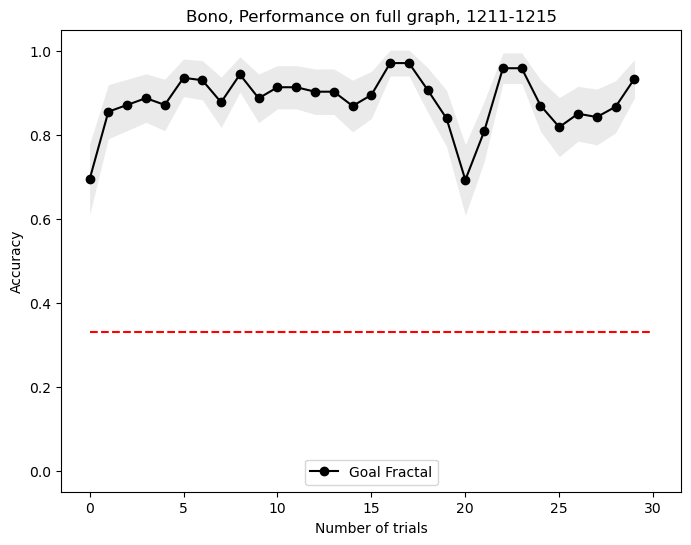

In [77]:
# average

accuracy = np.ones((len(goalblock)-2,30))*np.nan

plt.close('all')
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
goalcolors=['lawngreen','','lightblue','','g','r','','b','','salmon']

for bb in range(len(goalblock)-2):
    blockindex=np.arange(goalblock[bb],goalblock[bb+1])
    if len(center.iloc[blockindex])>30:
        accuracy[bb,:]=center.iloc[blockindex]['Choice'].values[:30]
    else:
        accuracy[bb,:len(center.iloc[blockindex])]=center.iloc[blockindex]['Choice'].values
    
mean=np.nanmean(accuracy,axis=0)
sem=np.nanstd(accuracy,axis=0)/np.sqrt(30)
plt.plot(np.arange(30),mean,color='k',marker='o',label='Goal Fractal')
plt.fill_between(np.arange(30),mean-sem,mean+sem,alpha=0.2,linewidth=0,color=[0.6,0.6,0.6])

plt.ylim(0,1.02)
plt.title('Bono, Performance on full graph, 1211-1215')
plt.xlabel('Number of trials')
plt.ylabel('Accuracy')
plt.plot([0,30],[0.33,0.33],'r--')
plt.ylim(-0.05,1.05)
plt.legend(loc='lower center')
# plt.savefig('Bono, Average Performance on full graph, 1211-1215')

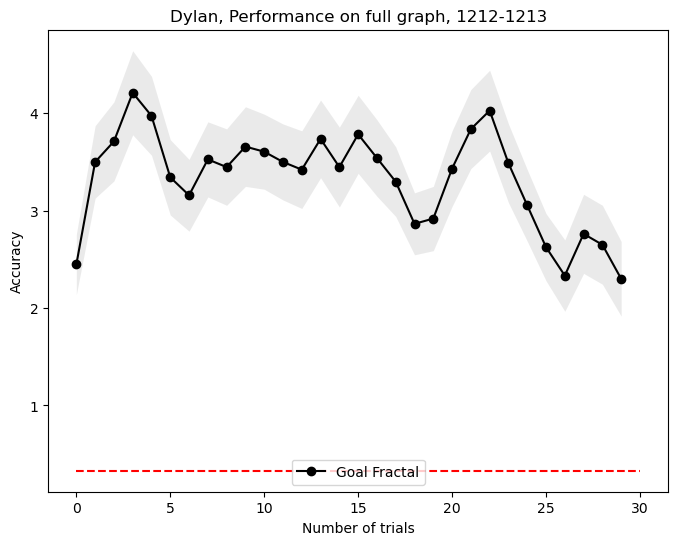

In [81]:
# average

accuracy = np.ones((len(goalblock)-2,30))*np.nan

plt.close('all')
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
goalcolors=['lawngreen','','lightblue','','g','r','','b','','salmon']

for bb in range(len(goalblock)-2):
    blockindex=np.arange(goalblock[bb],goalblock[bb+1])
    if len(center.iloc[blockindex])>30:
        accuracy[bb,:]=center.iloc[blockindex]['Choice'].values[:30]
    else:
        accuracy[bb,:len(center.iloc[blockindex])]=center.iloc[blockindex]['EpisodeLength'].values
    
mean=np.nanmean(accuracy,axis=0)
sem=np.nanstd(accuracy,axis=0)/np.sqrt(30)
plt.plot(np.arange(30),mean,color='k',marker='o',label='Goal Fractal')
plt.fill_between(np.arange(30),mean-sem,mean+sem,alpha=0.2,linewidth=0,color=[0.6,0.6,0.6])

plt.title('Dylan, Performance on full graph, 1212-1213')
plt.xlabel('Number of trials')
plt.ylabel('Accuracy')
plt.plot([0,30],[0.33,0.33],'r--')
# plt.ylim(-0.05,1.05)
plt.legend(loc='lower center')
# plt.savefig('Dylan, Average Performance on full graph, 1214-1215')

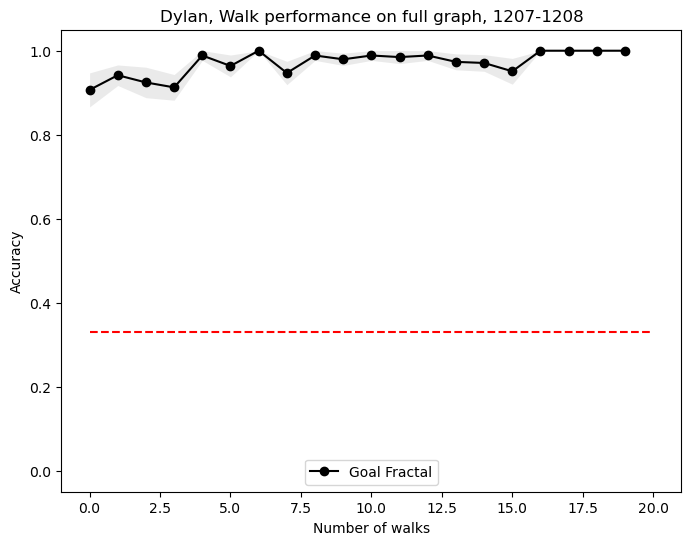

In [6]:
# average

accuracy = np.ones((len(goalblock)-2,20))*np.nan

plt.close('all')
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
goalcolors=['lawngreen','','lightblue','','g','r','','b','','salmon']

for bb in range(len(goalblock)-2):
    blockindex = np.arange(goalblock[bb],goalblock[bb+1])
    temp = center.iloc[blockindex].groupby(['EpisodeNum']).mean().Choice.values
    if len(temp)>20:
        accuracy[bb,:]=temp[:20]
    else:
        accuracy[bb,:len(temp)]=temp
    
mean=np.nanmean(accuracy,axis=0)
sem=np.nanstd(accuracy,axis=0)/np.sqrt(20)
plt.plot(np.arange(20),mean,color='k',marker='o',label='Goal Fractal')
plt.fill_between(np.arange(20),mean-sem,mean+sem,alpha=0.2,linewidth=0,color=[0.6,0.6,0.6])

plt.ylim(0,1.02)
plt.title('Dylan, Walk performance on full graph, 1207-1208')
plt.xlabel('Number of walks')
plt.ylabel('Accuracy')
plt.plot([0,20],[0.33,0.33],'r--')
plt.ylim(-0.05,1.05)
plt.legend(loc='lower center')
# plt.savefig('Dylan, Walk Performance on full graph, 1207-1208')

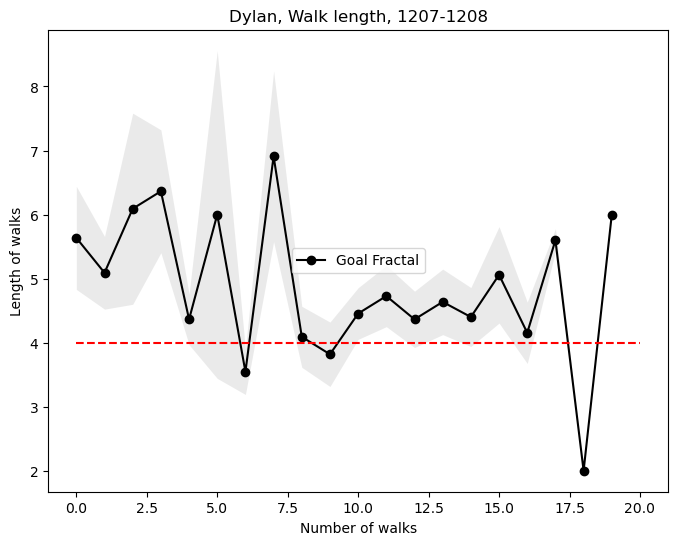

In [7]:
# average

goalblock = np.insert(np.where(np.diff(beh.Goal.values)!=0)[0]+1,0,False)
goalblock = np.append(goalblock,len(beh))

accuracy = np.ones((len(goalblock)-2,20))*np.nan

plt.close('all')
plt.figure(figsize=(8,6),facecolor=(1, 1, 1))
goalcolors=['lawngreen','','lightblue','','g','r','','b','','salmon']

for bb in range(len(goalblock)-2):
    blockindex = np.arange(goalblock[bb],goalblock[bb+1])
    temp = beh.iloc[blockindex].groupby(['EpisodeNum']).count().Choice.values
    if len(temp)>20:
        accuracy[bb,:]=temp[:20]
    else:
        accuracy[bb,:len(temp)]=temp
    
mean=np.nanmean(accuracy,axis=0)
sem=np.nanstd(accuracy,axis=0)/np.sqrt(20)
plt.plot(np.arange(20),mean,color='k',marker='o',label='Goal Fractal')
plt.fill_between(np.arange(20),mean-sem,mean+sem,alpha=0.2,linewidth=0,color=[0.6,0.6,0.6])

plt.title('Dylan, Walk length, 1207-1208')
plt.xlabel('Number of walks')
plt.ylabel('Length of walks')
plt.plot([0,20],[4,4],'r--')
# plt.ylim(-0.05,1.05)
plt.legend(loc='center')
# plt.savefig('Dylan, Walk length, 1207-1208')